In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 

C:\Users\guriv\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import warnings
warnings.filterwarnings('ignore', message='Pandas requires version .* of bottleneck .* currently installed', category=UserWarning)


In [3]:
pd.set_option("display.max_columns", None)

In [4]:
df=pd.read_csv("gurgaon_properties_feature_engineered_cleaned.csv").drop_duplicates()

In [5]:
df.isnull().sum()

property_type             1
society                   2
sector                    0
price                    18
Price_per_sqft           18
area                     18
areaWithType              1
bedRoom                   1
bathroom                  1
balcony                   1
floorNum                 20
facing                 1038
agePossession             0
super_built_up_area    1787
built_up_area          1986
carpet_area            1793
store room                0
study room                0
servant room              0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [539]:
df.shape

(3662, 23)

In [540]:
df.head(2)

,property_type,society,sector,price,Price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score
0,flat,tulip ivory,sector 70,5.0,10416.0,4800.0,Carpet area: 4800 (445.93 sq.m.),6.0,7.0,3+,0.0,NaN,Relatively New,NaN,NaN,4800.00,0,1,1,0,0,0,119
1,flat,signature global the millennia,sector 37d,0.6,9230.0,650.0,Super Built up area 650(60.39 sq.m.)Carpet are...,2.0,2.0,3,7.0,NaN,New Property,650.0,NaN,596.12,0,0,0,0,0,0,35


In [541]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3662 entries, 0 to 3787
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3661 non-null   object 
 1   society              3660 non-null   object 
 2   sector               3662 non-null   object 
 3   price                3644 non-null   float64
 4   Price_per_sqft       3644 non-null   float64
 5   area                 3644 non-null   float64
 6   areaWithType         3661 non-null   object 
 7   bedRoom              3661 non-null   float64
 8   bathroom             3661 non-null   float64
 9   balcony              3661 non-null   object 
 10  floorNum             3642 non-null   float64
 11  facing               2624 non-null   object 
 12  agePossession        3662 non-null   object 
 13  super_built_up_area  1875 non-null   float64
 14  built_up_area        1676 non-null   float64
 15  carpet_area          1869 non-null   float6

C:\Users\guriv\AppData\Local\Temp\ipykernel_6188\50337492.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"])
C:\Users\guriv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

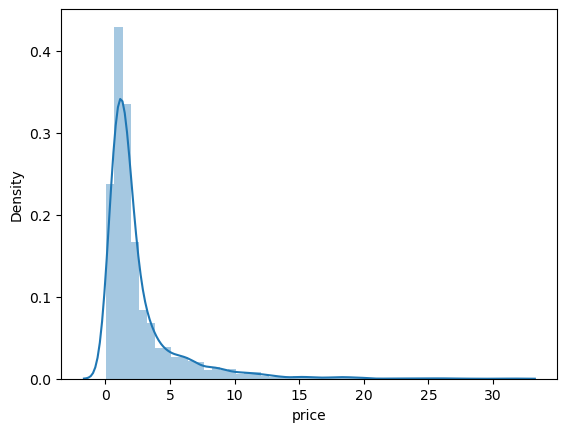

In [542]:
sns.distplot(df["price"])

<Axes: >

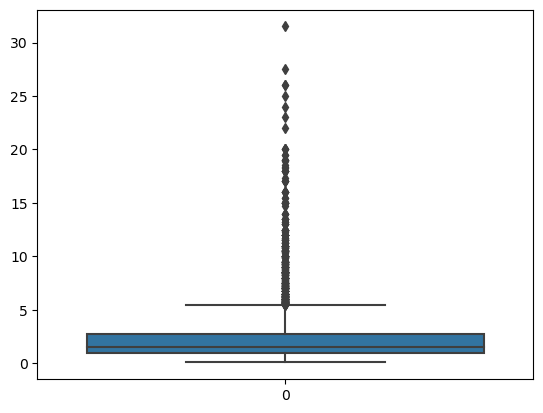

In [543]:
sns.boxplot(df["price"])

In [544]:
df["price"].describe()

count    3644.000000
mean        2.531265
std         2.979243
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

In [545]:
# ITS A RIGHT SKEWED DATA 
# Calculate IQR and outlier boundaries for price
Q1_price = df["price"].quantile(0.25)
Q3_price = df["price"].quantile(0.75)

IQR_price = Q3_price - Q1_price

lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price




# We are considering values under the lower bound and higher than the upper bound as outlier 

outliers_price= df[(df["price"]<lower_bound) | (df["price"]>upper_bound)]


In [546]:
outliers_price.shape

(423, 23)

In [547]:
outliers_price["price"].describe()

count    423.000000
mean       9.232009
std        4.067408
min        5.460000
25%        6.450000
50%        8.000000
75%       10.655000
max       31.500000
Name: price, dtype: float64

In [548]:
# MOST OF THE OUTLIERS SEEMS GENUINE OUTLIERS BUT A FEW SEEMS TO BE TRUE OUTLIERS 

C:\Users\guriv\AppData\Local\Temp\ipykernel_6188\1396154673.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price_per_sqft"])
C:\Users\guriv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price_per_sqft', ylabel='Density'>

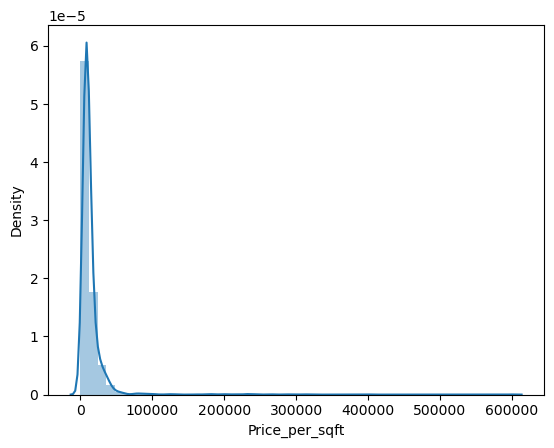

In [549]:
sns.distplot(df["Price_per_sqft"])

<Axes: >

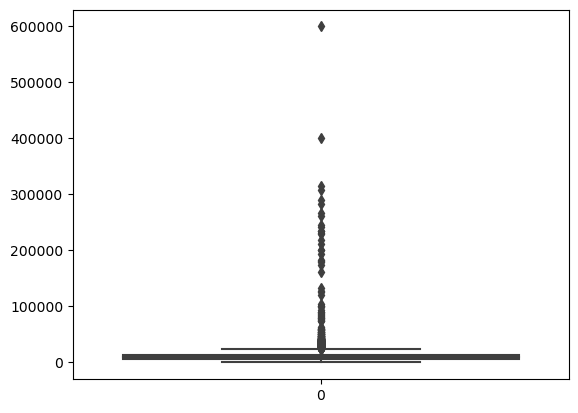

In [550]:
sns.boxplot(df["Price_per_sqft"])

In [551]:
# Calculate IQR and outlier boundaries for Price_per_sqft
Q1_sqft = df["Price_per_sqft"].quantile(0.25)
Q3_sqft = df["Price_per_sqft"].quantile(0.75)

IQR_sqft = Q3_sqft - Q1_sqft

lower_bound_sqft = Q1_sqft - 1.5 * IQR_sqft
upper_bound_sqft = Q3_sqft + 1.5 * IQR_sqft

# Identify outliers
outliers_sqft = df[(df["Price_per_sqft"] < lower_bound_sqft) | (df["Price_per_sqft"] > upper_bound_sqft)]


 

In [552]:
outliers_sqft.shape
outliers_sqft["Price_per_sqft"].describe()

count       353.000000
mean      52655.994334
std       61225.915424
min       24455.000000
25%       28200.000000
50%       33404.000000
75%       42032.000000
max      600000.000000
Name: Price_per_sqft, dtype: float64

#here the Price_per_sqft seems to be wrongly calculated for its values less than 1000
#so for values less than 1000 i have recalculated the values by multiplying area wiht 9 there by converting area(yards) to area(sqft) (outliers_sqft["price"]*10000000/outliers_sqft["area"]) and updated the new Price_per_sqft values in original df 

In [553]:
outliers_sqft["area"] = outliers_sqft["area"].apply(lambda x:x*9 if x<1000 else x)

C:\Users\guriv\AppData\Local\Temp\ipykernel_6188\3268650499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft["area"] = outliers_sqft["area"].apply(lambda x:x*9 if x<1000 else x)


In [554]:
outliers_sqft["Price_per_sqft"] = round(outliers_sqft["price"]*10000000/outliers_sqft["area"])

C:\Users\guriv\AppData\Local\Temp\ipykernel_6188\1671743708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft["Price_per_sqft"] = round(outliers_sqft["price"]*10000000/outliers_sqft["area"])


In [555]:
outliers_sqft["Price_per_sqft"].describe()

count      353.000000
mean     29427.671388
std      12343.370909
min       2723.000000
25%      25562.000000
50%      29880.000000
75%      35556.000000
max      82540.000000
Name: Price_per_sqft, dtype: float64

In [556]:
df.update(outliers_sqft)

C:\Users\guriv\AppData\Local\Temp\ipykernel_6188\1396154673.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price_per_sqft"])
C:\Users\guriv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price_per_sqft', ylabel='Density'>

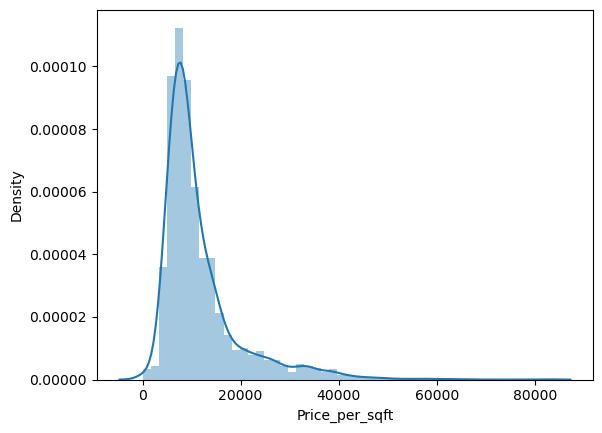

In [557]:
sns.distplot(df["Price_per_sqft"])

<Axes: >

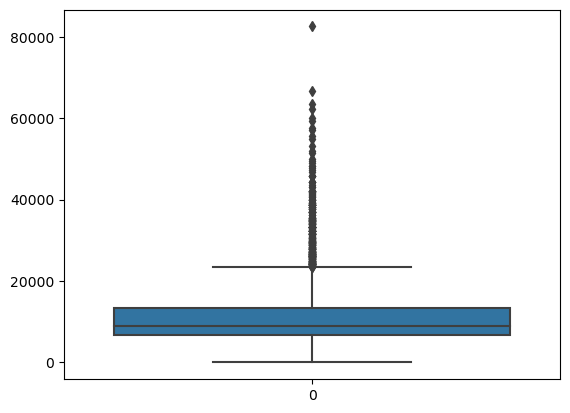

In [558]:
sns.boxplot(df["Price_per_sqft"])

In [559]:
df[df["Price_per_sqft"]> 50000].shape

(13, 23)

In [560]:
# Removed these 13 values for which Price_per_sqft is higher than 50000

In [561]:
df = df[df["Price_per_sqft"]<=50000]


<Axes: >

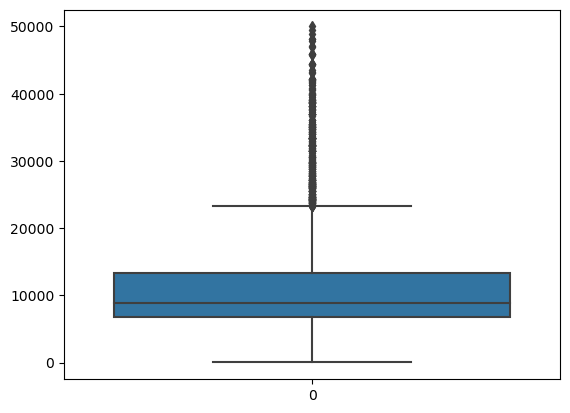

In [562]:
sns.boxplot(df["Price_per_sqft"])

In [563]:
df.shape

(3631, 23)

In [564]:
df["area"].describe()

count      3631.000000
mean       2949.512531
std       23258.769208
min         145.000000
25%        1263.000000
50%        1750.000000
75%        2343.500000
max      875000.000000
Name: area, dtype: float64

C:\Users\guriv\AppData\Local\Temp\ipykernel_6188\1267848389.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["area"])
C:\Users\guriv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='area', ylabel='Density'>

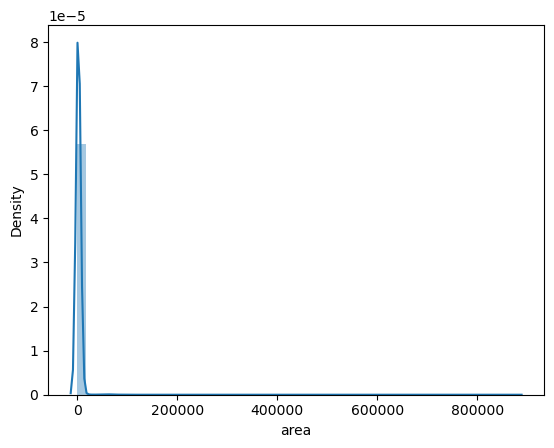

In [565]:
sns.distplot(df["area"])

<Axes: >

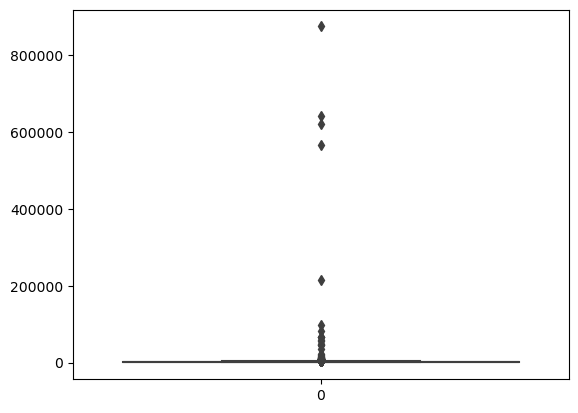

In [566]:
sns.boxplot(df["area"])

In [567]:
df[df["area"]>100000]

,property_type,society,sector,price,Price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score
978,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6.0,5.0,3+,2.0,NaN,New Property,NaN,2.0,NaN,0,1,1,1,1,1,0
2059,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2.0,2.0,2,2.0,South-West,New Property,NaN,NaN,569243.0,0,0,0,0,0,0,76
2472,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2.0,2.0,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0,0,0,0,0,2,44
3297,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2.0,2.0,1,3.0,North,New Property,NaN,NaN,514396.0,0,0,0,0,0,0,44
3639,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2.0,2.0,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,0,1,0,0,1,0,65


#Here these 5 values have area greater than 100000 yet the price seems to be so less as 0.5 million which seems to be anomoly so removed these 5 values 

In [568]:
df = df[df["area"]<=100000]

C:\Users\guriv\AppData\Local\Temp\ipykernel_6188\1267848389.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["area"])
C:\Users\guriv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='area', ylabel='Density'>

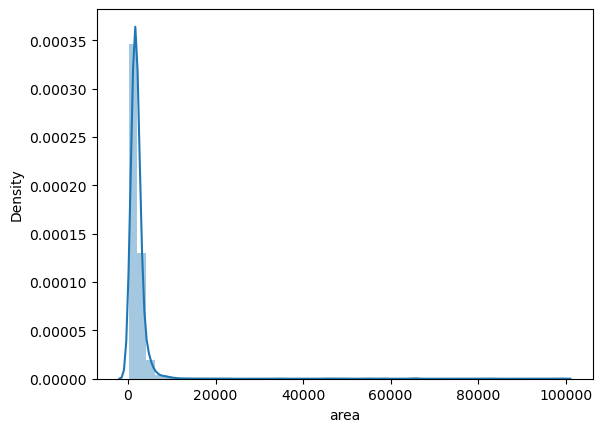

In [569]:
sns.distplot(df["area"])

<Axes: >

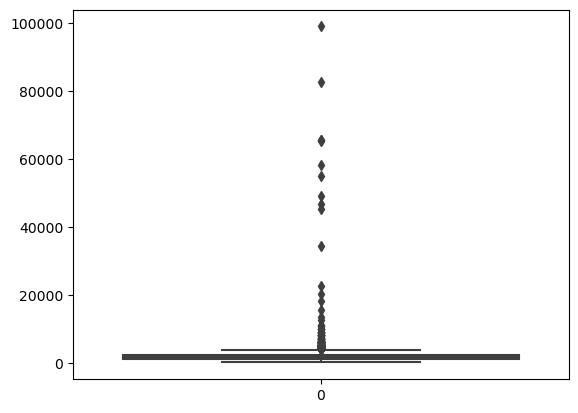

In [570]:
sns.boxplot(df["area"])

In [571]:
df["area"].describe()

count     3626.000000
mean      2148.273304
std       3628.516399
min        145.000000
25%       1262.000000
50%       1750.000000
75%       2340.750000
max      98978.000000
Name: area, dtype: float64

In [572]:
df[df["area"]>10000]
# area greater than 10000sqft


,property_type,society,sector,price,Price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score
192,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,1,0,1,0,0,1,109
371,house,unitech aspen greens,sector 50,6.95,4490.0,15479.0,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3.0,3.0,1,2.0,North-East,Moderately Old,NaN,2160.0,1720.00,0,0,1,0,0,0,160
543,flat,rof ananda,sector 95,0.21,61.0,34426.0,Carpet area: 34401 (3195.96 sq.m.),1.0,1.0,1,13.0,North,Relatively New,NaN,NaN,34401.00,0,0,0,0,0,0,68
865,house,independent,sector 4,0.85,630.0,13492.0,Plot area 1500(1254.19 sq.m.),3.0,3.0,1,1.0,North,Relatively New,NaN,13500.0,NaN,0,0,0,0,1,0,0
921,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
1145,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
1396,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9.0,9.0,3+,3.0,North-East,New Property,NaN,2660.0,2500.00,0,0,1,0,0,1,61
1405,flat,godrej icon,sector 88a,1.75,1384.0,12645.0,Carpet area: 1175.11,3.0,3.0,3+,6.0,NaN,New Property,NaN,NaN,1175.11,0,0,0,0,0,0,55
1412,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,0,1,1,1,1,1,42
1632,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.00,0,0,1,0,0,0,60


In [573]:
df.drop(index = [2306,3395, 2470,2100,1987, 2623,2469, 543, 865], inplace = True)

In [574]:
df[df["area"]>10000].sort_values("area", ascending= False)

,property_type,society,sector,price,Price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score
1145,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
921,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
192,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,1,0,1,0,0,1,109
1396,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9.0,9.0,3+,3.0,North-East,New Property,NaN,2660.0,2500.00,0,0,1,0,0,1,61
2160,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8.0,7.0,3+,3.0,East,Moderately Old,NaN,2850.0,2250.00,0,1,1,1,1,1,123
2847,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Under Construction,NaN,NaN,18122.00,0,1,0,1,1,1,44
371,house,unitech aspen greens,sector 50,6.95,4490.0,15479.0,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3.0,3.0,1,2.0,North-East,Moderately Old,NaN,2160.0,1720.00,0,0,1,0,0,0,160
1405,flat,godrej icon,sector 88a,1.75,1384.0,12645.0,Carpet area: 1175.11,3.0,3.0,3+,6.0,NaN,New Property,NaN,NaN,1175.11,0,0,0,0,0,0,55
1412,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,0,1,1,1,1,1,42
1632,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.00,0,0,1,0,0,0,60


In [575]:
df.loc[1145, "area"]=115*9
df.loc[921,"area"] = 7250
df.loc[192,"area"] = 5800
df.loc[1396,"area"] =2600
df.loc[2160,"area"] =2850
df.loc[2847,"area"] =1812
df.loc[371,"area"] =2160
df.loc[1405,"area"] =1175

C:\Users\guriv\AppData\Local\Temp\ipykernel_6188\1267848389.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["area"])
C:\Users\guriv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='area', ylabel='Density'>

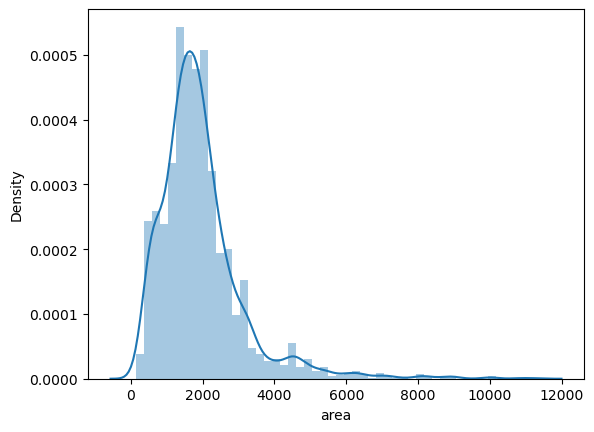

In [576]:
sns.distplot(df["area"])

<Axes: >

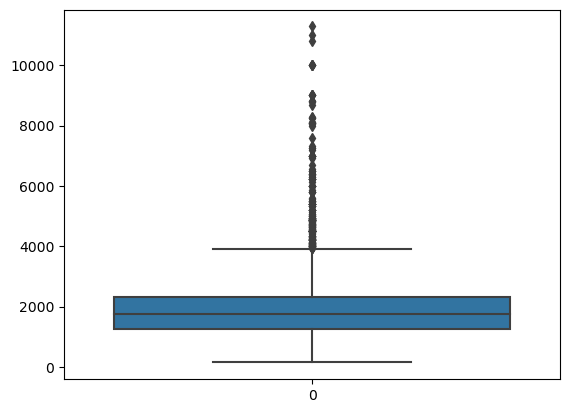

In [577]:
sns.boxplot(df["area"])

In [578]:
# Bedroom

In [579]:
df["area"].describe()

count     3617.000000
mean      1947.724357
std       1208.112359
min        145.000000
25%       1261.000000
50%       1750.000000
75%       2325.000000
max      11286.000000
Name: area, dtype: float64

In [580]:
df["bedRoom"].describe()

count    3617.000000
mean        3.322367
std         1.792478
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

<Axes: >

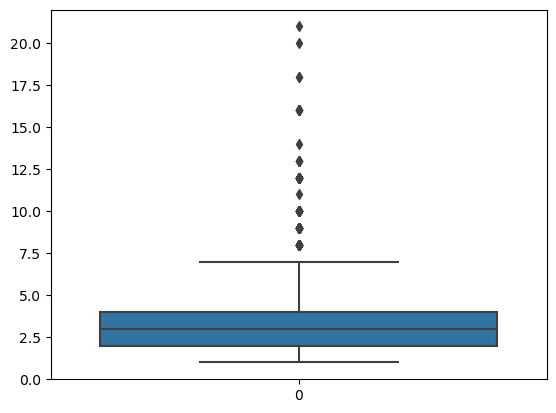

In [581]:
sns.boxplot(df["bedRoom"])

In [582]:
df["bedRoom"].describe()

count    3617.000000
mean        3.322367
std         1.792478
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [583]:
df[df["bedRoom"]>10]

,property_type,society,sector,price,Price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score
100,house,independent,sector 11,4.50,25000.0,1800.0,Plot area 200(167.23 sq.m.),16.0,16.0,3+,4.0,South,Relatively New,NaN,1800.0,NaN,0,0,0,0,0,1,20
180,house,uppal southend,sector 49,6.75,32328.0,2088.0,Plot area 232(193.98 sq.m.),12.0,12.0,3+,3.0,North,Moderately Old,NaN,2088.0,NaN,0,1,1,1,1,1,49
233,house,independent,sector 55,7.49,27741.0,2700.0,Plot area 300(250.84 sq.m.),12.0,12.0,3+,4.0,South-East,Relatively New,NaN,2700.0,NaN,0,1,1,1,0,1,49
662,house,laxmi garden sector-11,sector 11,1.50,12820.0,1170.0,Plot area 130(108.7 sq.m.),12.0,9.0,1,3.0,East,Relatively New,NaN,1170.0,NaN,0,1,1,1,1,1,106
772,house,independent,sector 31,9.25,39530.0,2340.0,Plot area 265(221.57 sq.m.)Built Up area: 262 ...,12.0,12.0,3+,4.0,North-East,New Property,NaN,262.0,260.0,0,0,1,1,1,2,49
773,house,independent,sector 24,3.20,6584.0,4860.0,Plot area 60(50.17 sq.m.),14.0,14.0,3+,6.0,West,Relatively New,NaN,540.0,NaN,0,0,0,0,0,2,15
869,house,independent,sector 26,10.50,43210.0,2430.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,12.0,12.0,3+,4.0,North-East,Relatively New,NaN,300.0,270.0,0,0,1,1,0,1,72
883,house,dlf city phase 1,sector 26,9.25,47804.0,1935.0,Plot area 1935(179.77 sq.m.)Built Up area: 700...,12.0,12.0,3+,4.0,North-East,New Property,NaN,7000.0,NaN,0,0,1,1,0,1,43
1079,house,uppal southend,sector 49,6.75,32328.0,2088.0,Plot area 232(21.55 sq.m.),12.0,12.0,3+,NaN,West,Moderately Old,NaN,232.0,NaN,0,1,1,1,1,1,49
1203,house,huda plot sector 38,sector 38,4.30,27302.0,1575.0,Plot area 163(15.14 sq.m.)Built Up area: 145 s...,13.0,13.0,3+,5.0,North-West,Relatively New,NaN,145.0,NaN,0,0,0,0,0,2,7


In [584]:
df =df[df["bedRoom"]<=10]

In [585]:
df.shape

(3574, 23)

<Axes: >

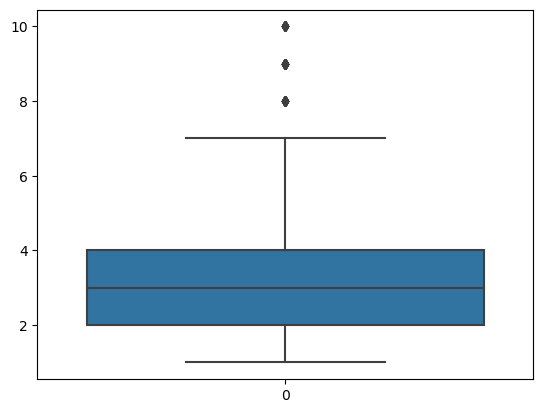

In [586]:
sns.boxplot(df["bedRoom"])

C:\Users\guriv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bedRoom', ylabel='Count'>

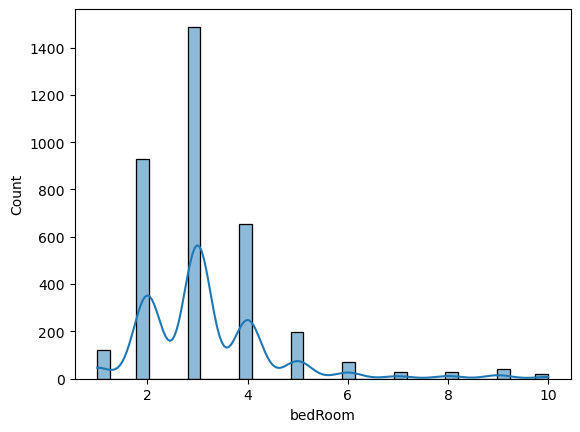

In [587]:
sns.histplot(df["bedRoom"], kde = True)

<Axes: >

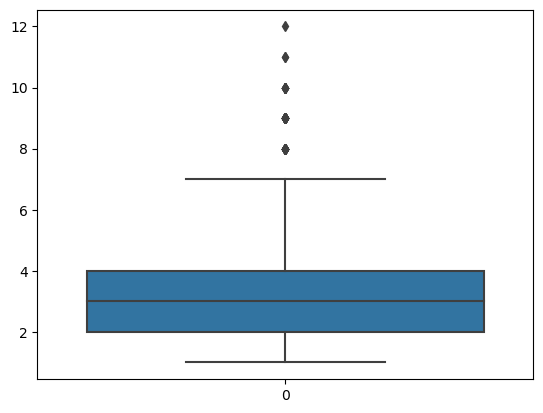

In [588]:
sns.boxplot(df["bathroom"])

In [589]:
df["bathroom"].describe()

count    3574.000000
mean        3.270565
std         1.451652
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        12.000000
Name: bathroom, dtype: float64

In [590]:
df[df["bathroom"]>10]

,property_type,society,sector,price,Price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score
29,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10.0,11.0,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0,0,0,1,0,2,38
1709,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8.0,11.0,3+,3.0,East,Old Property,NaN,5000.0,NaN,0,1,1,1,1,1,39
2407,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9.0,12.0,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0,0,1,0,0,1,146


In [591]:
#BATHROOM COLUMNS SEEMS RATIONAL NO NEED OF OMISSION 

In [592]:
# SUPER BUILTUP AREA 

In [593]:
df["super_built_up_area"].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

C:\Users\guriv\AppData\Local\Temp\ipykernel_6188\1771615301.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["super_built_up_area"])
C:\Users\guriv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='super_built_up_area', ylabel='Density'>

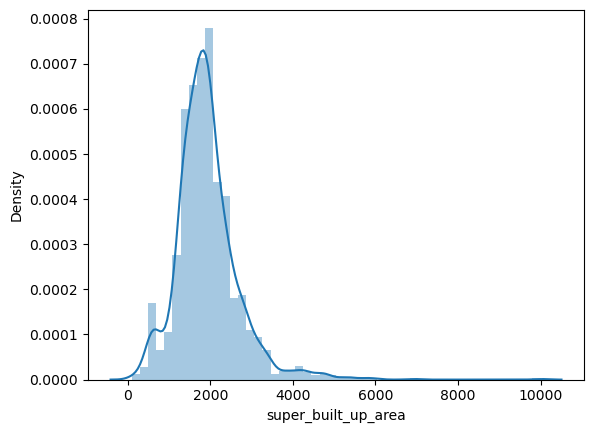

In [594]:
sns.distplot(df["super_built_up_area"])

<Axes: >

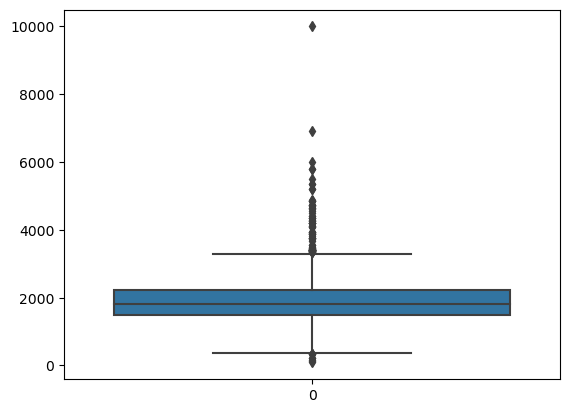

In [595]:
sns.boxplot(df["super_built_up_area"])

In [596]:
df[df["super_built_up_area"]>6000]

,property_type,society,sector,price,Price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score
1651,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4.0,4.0,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0,0,1,0,0,1,140
3697,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5.0,6.0,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0,0,1,1,1,0,49


In [597]:
# builtup area 

In [598]:
df["built_up_area"].describe()

count     1601.000000
mean      1939.610262
std       1391.652934
min         14.000000
25%       1125.000000
50%       1650.000000
75%       2385.000000
max      11286.000000
Name: built_up_area, dtype: float64

<Axes: >

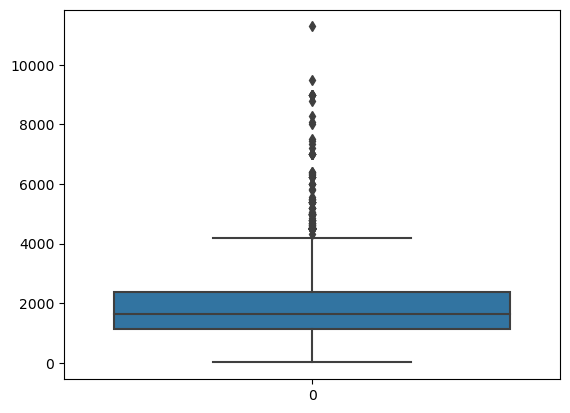

In [599]:
sns.boxplot(df["built_up_area"])

In [600]:
df[df["built_up_area"]>10000]

,property_type,society,sector,price,Price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score
1412,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,0,1,1,1,1,1,42


In [601]:
df["carpet_area"].describe()

count     1847.000000
mean      1434.444980
std       1042.148242
min         15.000000
25%        845.000000
50%       1300.000000
75%       1770.365000
max      18122.000000
Name: carpet_area, dtype: float64

<Axes: >

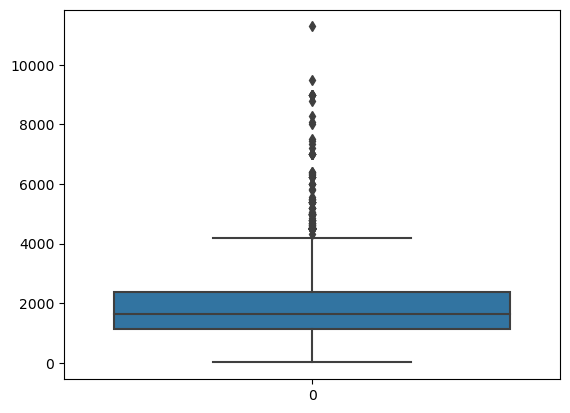

In [602]:
sns.boxplot(df["built_up_area"])

In [603]:
df[df["carpet_area"]>10000]

,property_type,society,sector,price,Price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score
1632,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,0,1,0,0,0,60
2847,flat,godrej air,sector 85,2.5,1379.0,1812.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,0,1,0,1,1,1,44


In [604]:
df.loc[2847, "carpet_area"]=1812

In [605]:
df[df["carpet_area"]>10000]

,property_type,society,sector,price,Price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score
1632,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,0,1,0,0,0,60


In [606]:
df.head(5)

,property_type,society,sector,price,Price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score
0,flat,tulip ivory,sector 70,5.00,10416.0,4800.0,Carpet area: 4800 (445.93 sq.m.),6.0,7.0,3+,0.0,NaN,Relatively New,NaN,NaN,4800.00,0,1,1,0,0,0,119
1,flat,signature global the millennia,sector 37d,0.60,9230.0,650.0,Super Built up area 650(60.39 sq.m.)Carpet are...,2.0,2.0,3,7.0,NaN,New Property,650.0,NaN,596.12,0,0,0,0,0,0,35
2,flat,bestech altura,sector 79,1.90,9000.0,2111.0,Carpet area: 2150 (199.74 sq.m.),3.0,4.0,2,11.0,NaN,New Property,NaN,NaN,2150.00,0,0,1,0,0,0,49
3,flat,conscient elevate,sector 59,6.75,19882.0,3395.0,Super Built up area 3395(315.41 sq.m.)Carpet a...,4.0,4.0,2,10.0,NaN,New Property,3395.0,NaN,1855.00,0,0,1,0,0,0,31
4,flat,vatika city,sector 49,1.98,9074.0,2182.0,Super Built up area 2182(202.71 sq.m.)Built Up...,3.0,4.0,3,9.0,South-East,Moderately Old,2182.0,1750.75,1670.00,0,0,1,0,0,1,101


In [607]:
df["luxury_score"].describe()

count    3574.000000
mean       72.055680
std        53.214856
min         0.000000
25%        32.000000
50%        60.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

C:\Users\guriv\AppData\Local\Temp\ipykernel_6188\536211849.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["luxury_score"])
C:\Users\guriv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='luxury_score', ylabel='Density'>

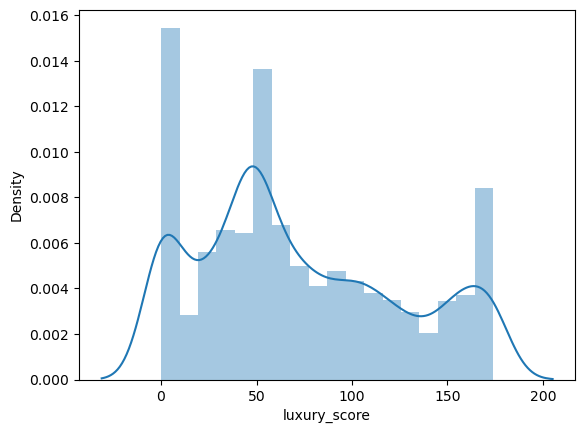

In [608]:
sns.distplot(df["luxury_score"])

<Axes: >

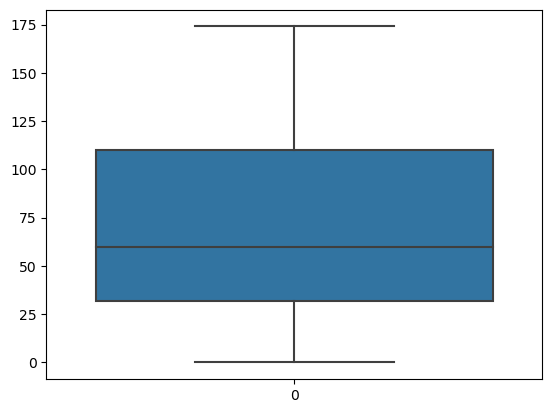

In [609]:
sns.boxplot(df["luxury_score"])

In [610]:
df["Price_per_sqft"].describe()

count     3574.000000
mean     11240.081142
std       7073.239305
min        151.000000
25%       6735.000000
50%       8888.000000
75%      13224.000000
max      49500.000000
Name: Price_per_sqft, dtype: float64

In [611]:
df["Price_per_sqft"] = round(df["price"]*10000000/df["area"])

<Axes: >

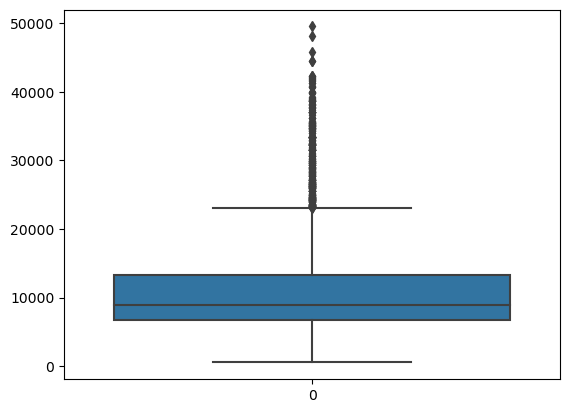

In [612]:
sns.boxplot(df["Price_per_sqft"])

In [613]:
df[df["Price_per_sqft"]>42000]

,property_type,society,sector,price,Price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score
527,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4.0,5.0,3+,4.0,East,Relatively New,NaN,2844.0,NaN,1,0,1,1,0,1,60
1061,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2.0,2.0,2,3.0,North,Undefined,NaN,2000.0,1800.0,0,0,0,0,0,0,0
1319,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9.0,9.0,3+,5.0,East,New Property,NaN,115.0,100.0,0,0,0,0,1,1,44
2106,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6.0,8.0,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1,1,1,1,0,1,103
2395,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5.0,5.0,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0,0,1,1,0,1,88
2863,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6.0,8.0,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1,1,1,1,0,2,0
2971,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6.0,6.0,3,2.0,East,Relatively New,NaN,4518.0,NaN,0,1,1,0,0,1,121
3021,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5.0,7.0,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,0,1,1,0,2,97
3579,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3.0,3.0,3+,4.0,North,New Property,NaN,2700.0,NaN,0,0,0,1,0,1,7


In [614]:
x = df[df["Price_per_sqft"]<=20000]
(x["area"]/x["bedRoom"]).quantile(0.05)

253.23333333333335

In [615]:
df[df["area"]/df["bedRoom"]<250]

,property_type,society,sector,price,Price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score
20,flat,mvn athens,sohna road,0.27,5895.0,458.0,Carpet area: 457.52 (42.5 sq.m.),2.0,2.0,1,0.0,NaN,Relatively New,NaN,NaN,457.46575,0,0,0,0,0,1,69
40,flat,pivotal devaan,sector 84,0.34,7039.0,483.0,Carpet area: 483 (44.87 sq.m.),2.0,2.0,1,1.0,East,Relatively New,NaN,NaN,483.00000,1,0,0,0,0,1,84
51,house,independent,sector 8,0.62,11273.0,550.0,Built Up area: 550 (51.1 sq.m.),3.0,1.0,0,2.0,NaN,Undefined,NaN,550.0,NaN,0,0,0,0,0,0,0
86,house,independent,sector 2,1.15,19360.0,594.0,Plot area 66(55.18 sq.m.),3.0,3.0,2,2.0,South-East,Old Property,NaN,594.0,NaN,0,0,0,0,0,1,32
130,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6.0,4.0,1,1.0,South-West,Undefined,NaN,NaN,900.00000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3673,flat,signature global solera,sector 107,0.50,7752.0,645.0,Carpet area: 645 (59.92 sq.m.),3.0,2.0,2,6.0,South-East,Relatively New,NaN,NaN,645.00000,0,0,0,0,1,0,15
3690,house,independent,sector 6,0.50,8333.0,600.0,Plot area 600(55.74 sq.m.),3.0,3.0,2,2.0,East,Moderately Old,NaN,600.0,NaN,0,0,0,1,0,0,0
3710,house,independent,sector 3,0.80,8155.0,981.0,Plot area 109(91.14 sq.m.),5.0,4.0,1,2.0,NaN,Moderately Old,NaN,981.0,NaN,0,0,0,0,0,0,0
3744,flat,signature global solera,sector 107,0.28,5622.0,498.0,Carpet area: 489 (45.43 sq.m.),2.0,2.0,2,14.0,North-West,Relatively New,NaN,NaN,489.00000,0,0,0,0,0,0,38


In [616]:
# there seems to be some error in these data points are area seems to be so small to accommodate the mentoned rooms 

In [617]:
df["area/room"] = df["area"]/df["bedRoom"]

In [618]:
df.sample()

,property_type,society,sector,price,Price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score,area/room
628,flat,tata primanti,sector 72,3.3,15103.0,2185.0,Super Built up area 2185(202.99 sq.m.)Built Up...,3.0,4.0,3+,15.0,North,New Property,2185.0,1800.0,1600.0,0,0,1,0,0,2,174,728.333333


In [619]:
 sample = df[df["area"]/df["bedRoom"]<250]

In [620]:
df.shape

(3574, 24)

C:\Users\guriv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


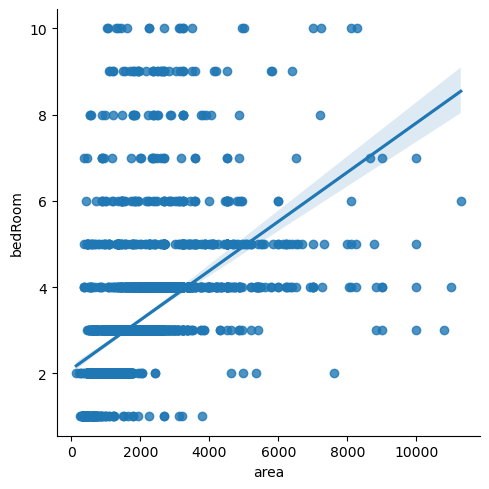

In [621]:
sns.lmplot(df, x = "area" , y= "bedRoom")

In [622]:
# even  for less area the no of bedrooms are on higher side 

In [623]:
 sample["bedRoom"].value_counts()

bedRoom
2.0     46
3.0     32
5.0     28
6.0     16
4.0     16
9.0     15
8.0     12
10.0     8
7.0      8
Name: count, dtype: int64

In [624]:
# removing those data points with area/room ratio less than 100 

In [625]:
df = df[df["area/room"]>100]

In [626]:
df.shape

(3555, 24)

In [627]:
outliers_df = df[(df["area/room"]<250) & (df["bedRoom"]>3)]

In [628]:
 outliers_df["bedRoom"] = round(outliers_df["bedRoom"]/outliers_df["floorNum"])

C:\Users\guriv\AppData\Local\Temp\ipykernel_6188\2796355261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df["bedRoom"] = round(outliers_df["bedRoom"]/outliers_df["floorNum"])


In [629]:
df.update(outliers_df)

In [630]:
df.shape

(3555, 24)

In [631]:
df[(df["area/room"]<250) & (df["bedRoom"]>4)].shape

(13, 24)

In [632]:
df = df[~((df["area/room"]<250) & (df["bedRoom"]>4))]

C:\Users\guriv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


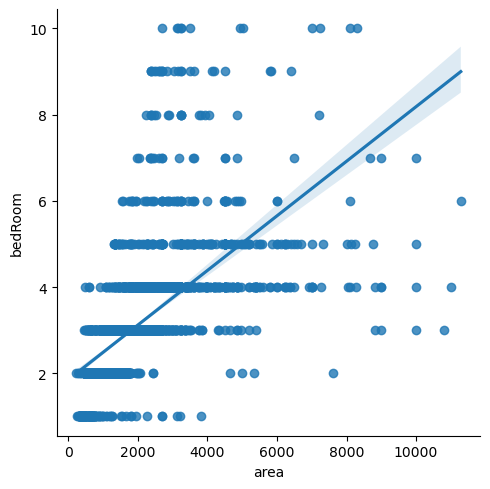

In [633]:
sns.lmplot(df, x="area", y= "bedRoom")

In [640]:
df = df.drop_duplicates()
df.shape

(3541, 24)

In [641]:
df.to_csv("gurgaon_properties_outlier_treated.csv" , index = False)